In [1]:
import numpy as np
import pandas as pd
import random
from EMDPM.model_generator import generate_logistic_model
from EMDPM.synthetic_data_generator import generate_synthetic_data
from EMDPM.visualization import (
    plot_biomarker_trajectories,
    plot_true_observations,
    plot_initial_beta_guess,
    plot_theta_fit_comparison,
    plot_theta_error_history,
    plot_beta_overlay,
    plot_beta_error_history,
    plot_lse
)
from EMDPM.utils import solve_system
from EMDPM.em_transformer import EM


true x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true f: [0.         0.01123988 0.01207819 0.01155182 0.02688619 0.
 0.01019029 0.         0.         0.         0.01652657 0.0128754
 0.01306715 0.         0.01352577 0.         0.01099695 0.
 0.         0.01300062]


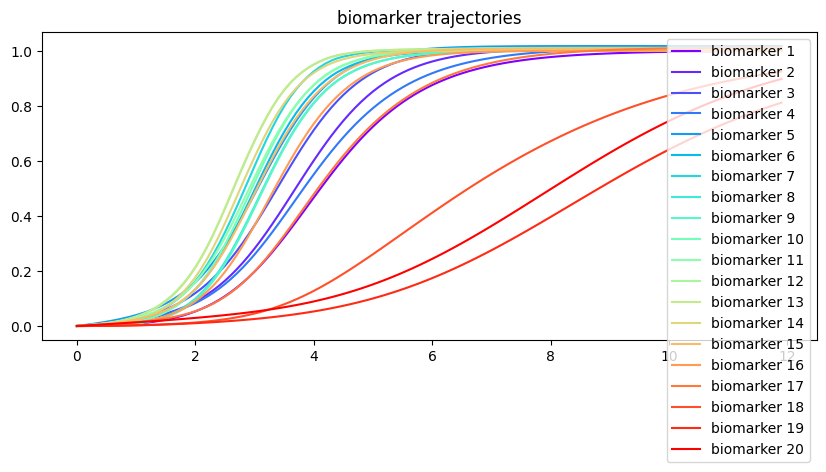

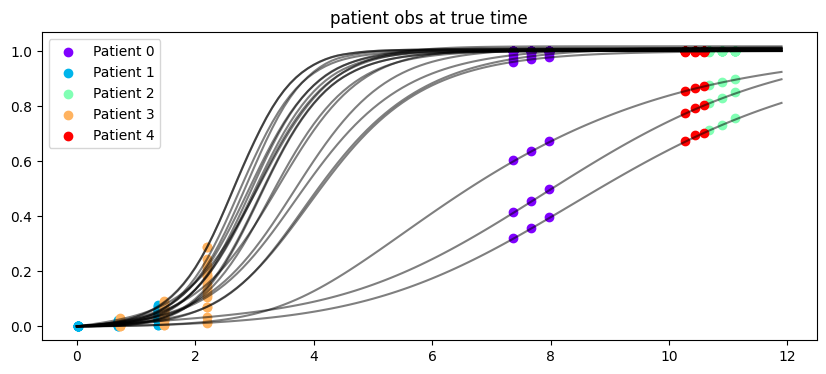

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824 0.07986404 0.05383256
 0.10993993 0.13257945 0.08262026 0.14778845 0.02372415 0.14300063
 0.0170779  0.10647585]
initial s: [2.79544046 1.30685669 0.19175346 0.80942044 2.73783142 2.61493628
 0.97118118 0.89594654 2.56627958 1.23194763 2.76895385 1.07435375
 2.58501779 1.07953042 1.76070828 2.50507976 0.17556968 1.85950923
 2.64783123 0.4718322 ]
initial scalar: 0.2251425668889057
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [07:14<00:39, 39.50s/it]


SUMMARY:
best LSE at iteration 6: 58.36358162665384
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01490907 0.16291554 0.08029182 0.184533
 0.15572293 0.19792942 0.02388094 0.10736655 0.1746095  0.11053824
 0.07986404 0.05383256 0.10993993 0.13257945 0.08262026 0.14778845
 0.02372415 0.14300063 0.0170779  0.10647585 2.79544046 1.30685669
 0.19175346 0.80942044 2.73783142 2.61493628 0.97118118 0.89594654
 2.56627958 1.23194763 2.76895385 1.07435375 2.58501779 1.07953042
 1.76070828 2.50507976 0.17556968 1.85950923 2.64783123 0.4718322
 0.22514257]
best theta:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.03071277 0.04402327 0.05133565 0.04375017
 0.08433279 0.048117 

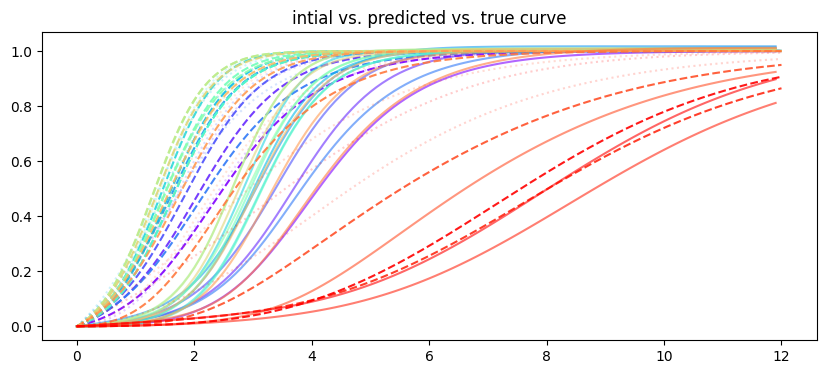

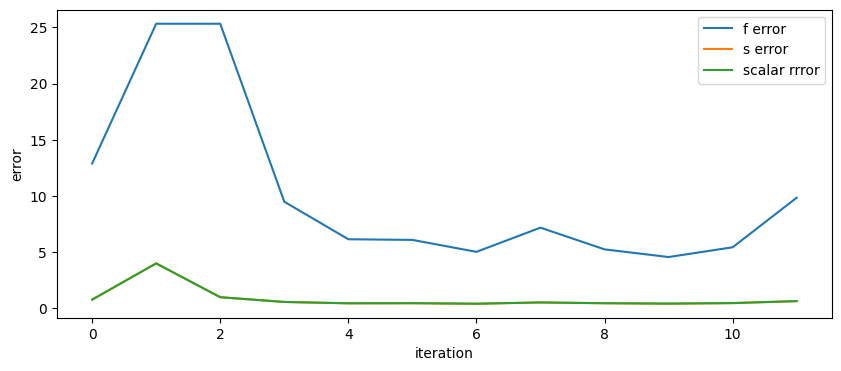

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


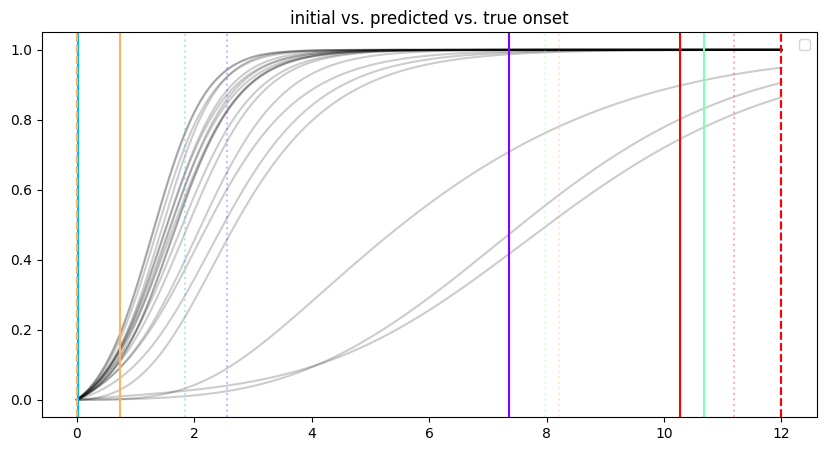

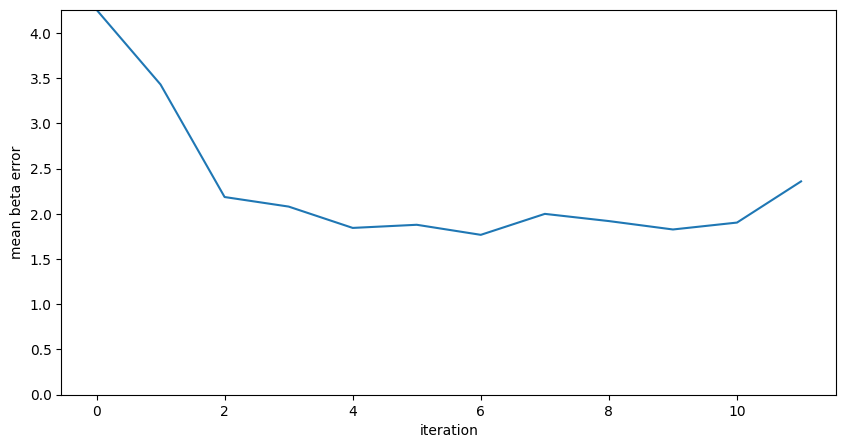

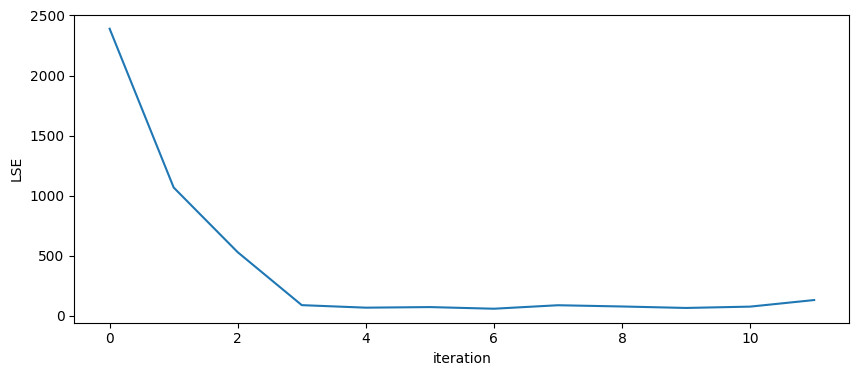

In [2]:
# params
n_biomarkers = 20
t_max = 12
t_span = np.linspace(0, t_max, 2000)
noise_level = 0.0
n_patients = 200
n_patient_obs = 3

# fit and transform
t, x_true, K, x0, f, scalar_K  = generate_logistic_model(n_biomarkers=n_biomarkers, t_max=t_max)

df, beta_true_dict = generate_synthetic_data(
    n_biomarkers = n_biomarkers,
    t_max = t_max, 
    noise_level = noise_level,
    n_patients = n_patients,
    n_patient_obs = n_patient_obs,
    x_true=x_true, 
    t=t,
)
plot_biomarker_trajectories(t, x_true, n_biomarkers=n_biomarkers)
plot_true_observations(df, t, x_true)

em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=False,
              lambda_cog=0.0,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


## cog = 0.01

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824 0.07986404 0.05383256
 0.10993993 0.13257945 0.08262026 0.14778845 0.02372415 0.14300063
 0.0170779  0.10647585]
initial s: [2.79544046 1.30685669 0.19175346 0.80942044 2.73783142 2.61493628
 0.97118118 0.89594654 2.56627958 1.23194763 2.76895385 1.07435375
 2.58501779 1.07953042 1.76070828 2.50507976 0.17556968 1.85950923
 2.64783123 0.4718322 ]
initial scalar: 0.2251425668889057
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [08:59<00:49, 49.06s/it]



SUMMARY:
best LSE at iteration 7: 6.22224130853002
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01490907 0.16291554 0.08029182 0.184533
 0.15572293 0.19792942 0.02388094 0.10736655 0.1746095  0.11053824
 0.07986404 0.05383256 0.10993993 0.13257945 0.08262026 0.14778845
 0.02372415 0.14300063 0.0170779  0.10647585 2.79544046 1.30685669
 0.19175346 0.80942044 2.73783142 2.61493628 0.97118118 0.89594654
 2.56627958 1.23194763 2.76895385 1.07435375 2.58501779 1.07953042
 1.76070828 2.50507976 0.17556968 1.85950923 2.64783123 0.4718322
 0.22514257]
best theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.0000

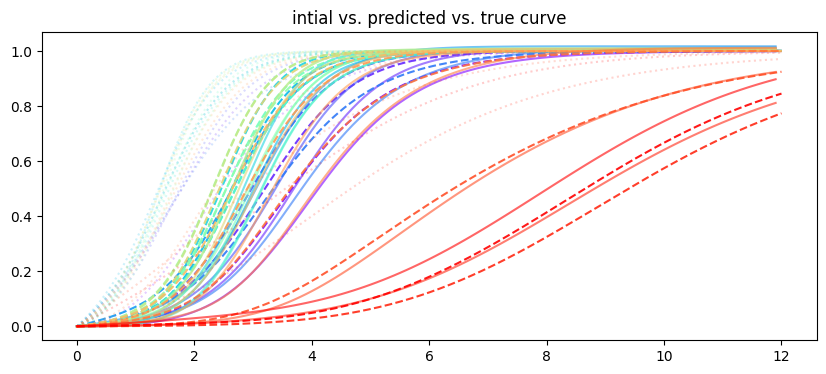

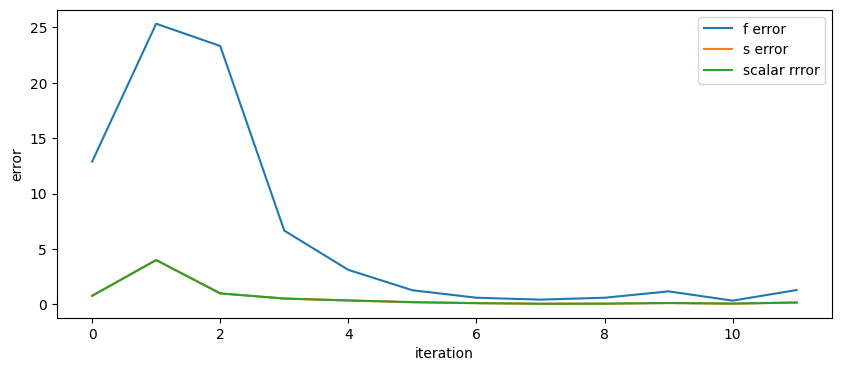

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


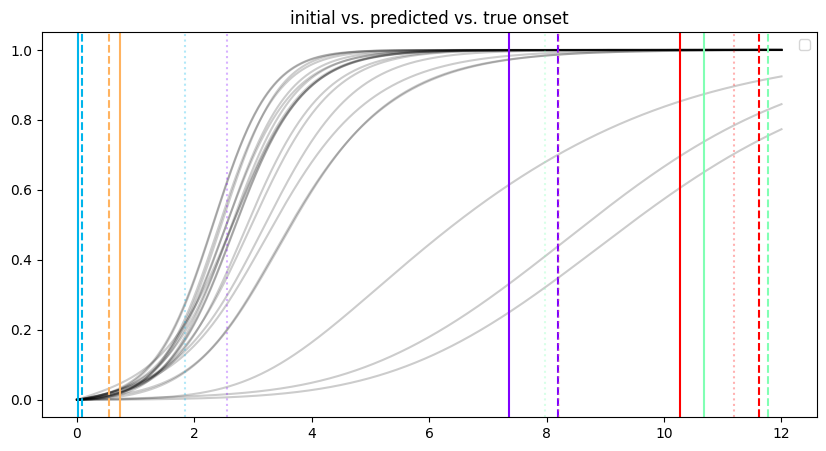

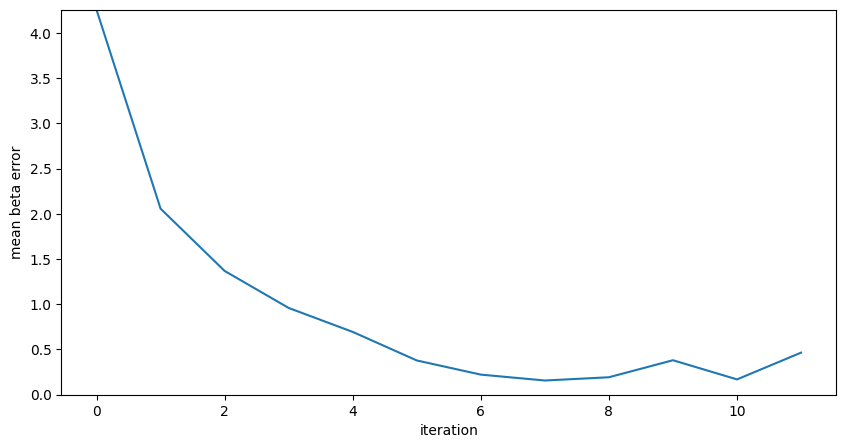

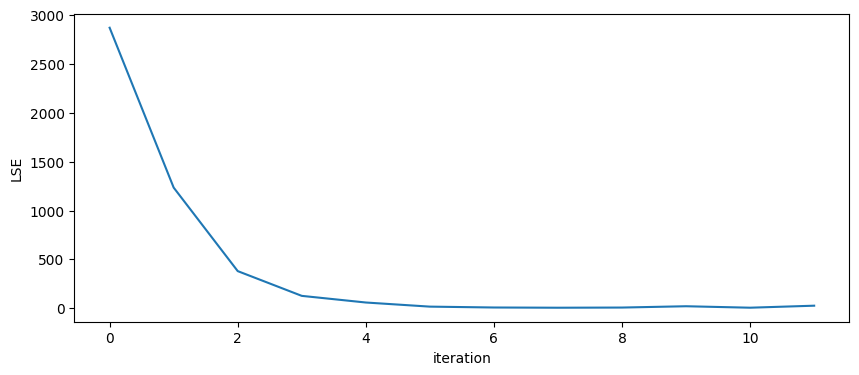

In [3]:
em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=False,
              lambda_cog=0.01,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


## cog = 0.1

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824 0.07986404 0.05383256
 0.10993993 0.13257945 0.08262026 0.14778845 0.02372415 0.14300063
 0.0170779  0.10647585]
initial s: [2.79544046 1.30685669 0.19175346 0.80942044 2.73783142 2.61493628
 0.97118118 0.89594654 2.56627958 1.23194763 2.76895385 1.07435375
 2.58501779 1.07953042 1.76070828 2.50507976 0.17556968 1.85950923
 2.64783123 0.4718322 ]
initial scalar: 0.2251425668889057
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [09:56<00:54, 54.24s/it]



SUMMARY:
best LSE at iteration 10: 27.171225587989124
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01490907 0.16291554 0.08029182 0.184533
 0.15572293 0.19792942 0.02388094 0.10736655 0.1746095  0.11053824
 0.07986404 0.05383256 0.10993993 0.13257945 0.08262026 0.14778845
 0.02372415 0.14300063 0.0170779  0.10647585 2.79544046 1.30685669
 0.19175346 0.80942044 2.73783142 2.61493628 0.97118118 0.89594654
 2.56627958 1.23194763 2.76895385 1.07435375 2.58501779 1.07953042
 1.76070828 2.50507976 0.17556968 1.85950923 2.64783123 0.4718322
 0.22514257]
best theta:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00967518 0.0242076  0.00755286 0.007764
 0.054209   0.0054183

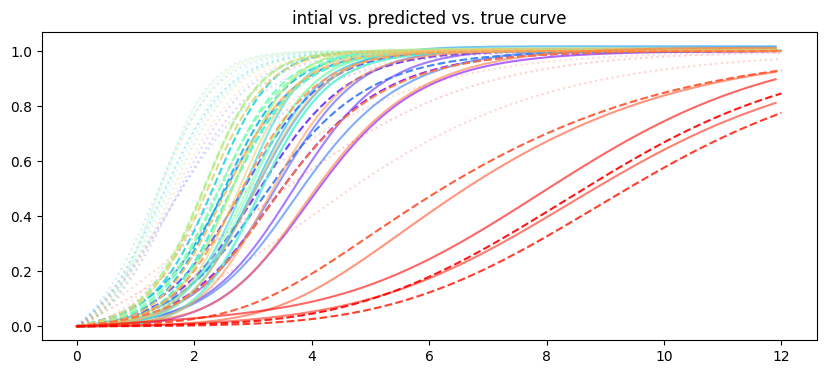

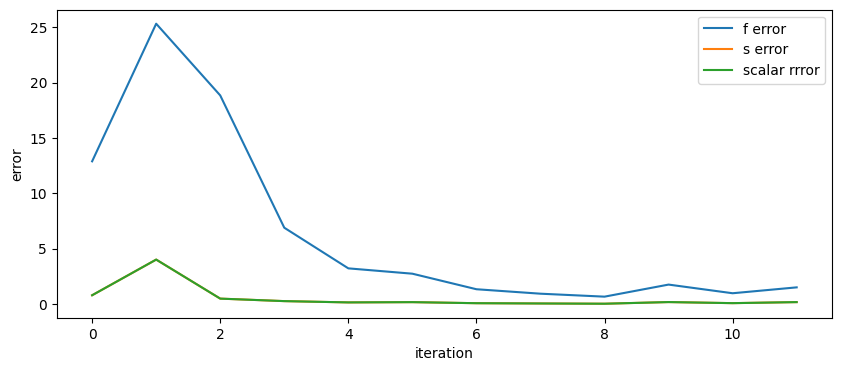

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


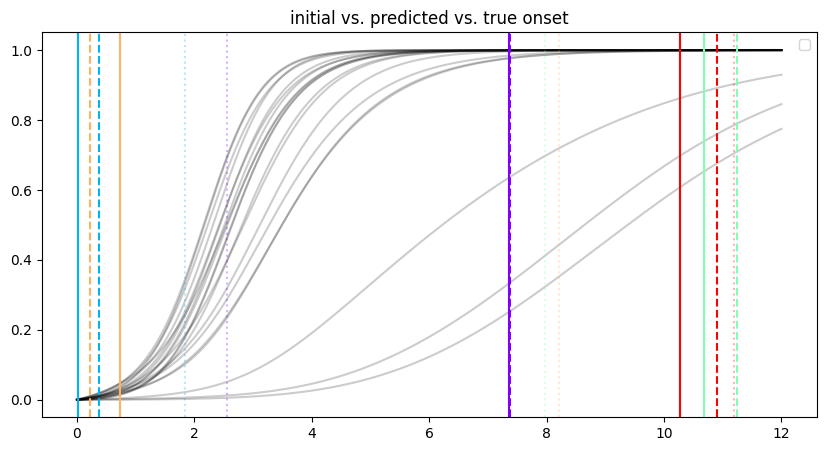

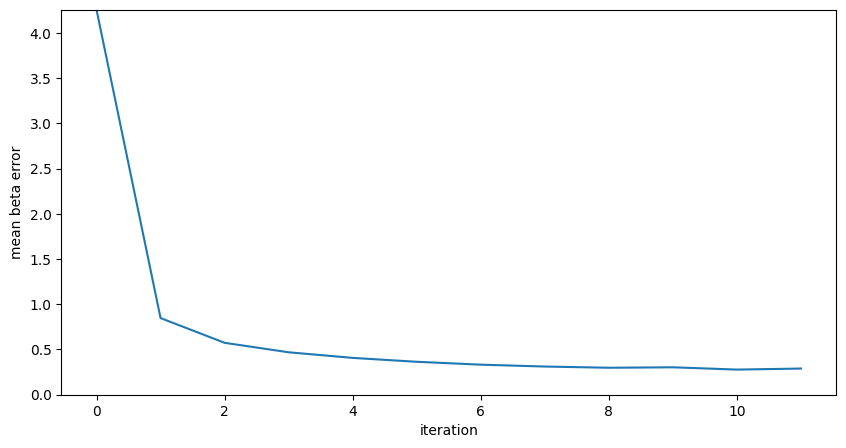

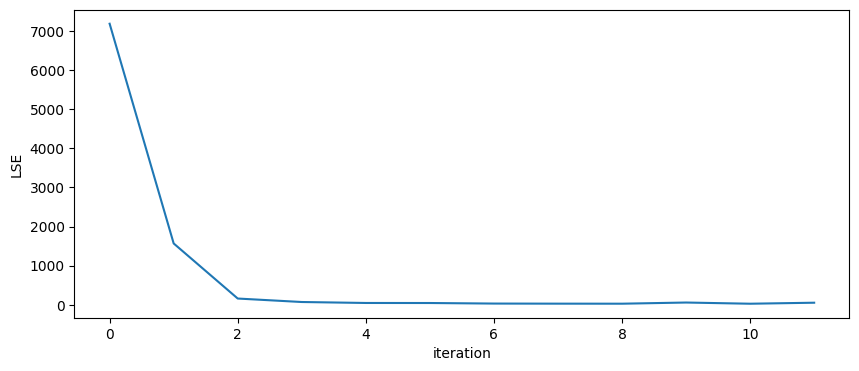

In [4]:
em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=False,
              lambda_cog=0.1,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


## cog = 1.0

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824 0.07986404 0.05383256
 0.10993993 0.13257945 0.08262026 0.14778845 0.02372415 0.14300063
 0.0170779  0.10647585]
initial s: [2.79544046 1.30685669 0.19175346 0.80942044 2.73783142 2.61493628
 0.97118118 0.89594654 2.56627958 1.23194763 2.76895385 1.07435375
 2.58501779 1.07953042 1.76070828 2.50507976 0.17556968 1.85950923
 2.64783123 0.4718322 ]
initial scalar: 0.2251425668889057
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [08:17<00:45, 45.18s/it]


SUMMARY:
best LSE at iteration 8: 80.06441428031272
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01490907 0.16291554 0.08029182 0.184533
 0.15572293 0.19792942 0.02388094 0.10736655 0.1746095  0.11053824
 0.07986404 0.05383256 0.10993993 0.13257945 0.08262026 0.14778845
 0.02372415 0.14300063 0.0170779  0.10647585 2.79544046 1.30685669
 0.19175346 0.80942044 2.73783142 2.61493628 0.97118118 0.89594654
 2.56627958 1.23194763 2.76895385 1.07435375 2.58501779 1.07953042
 1.76070828 2.50507976 0.17556968 1.85950923 2.64783123 0.4718322
 0.22514257]
best theta:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00379027 0.01687646 0.01902417 0.01708784
 0.03711026 0.0054823

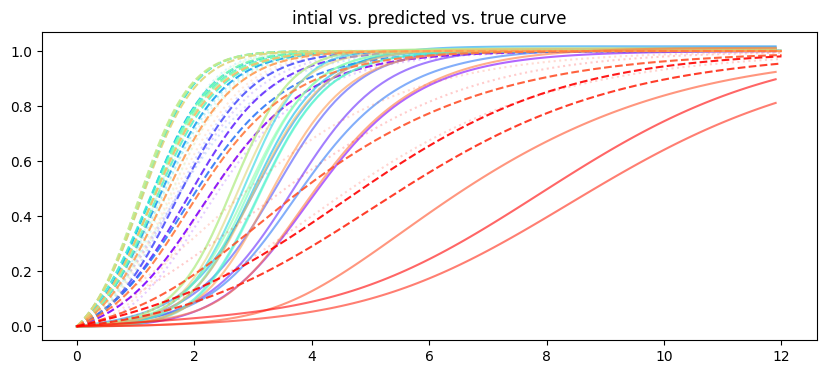

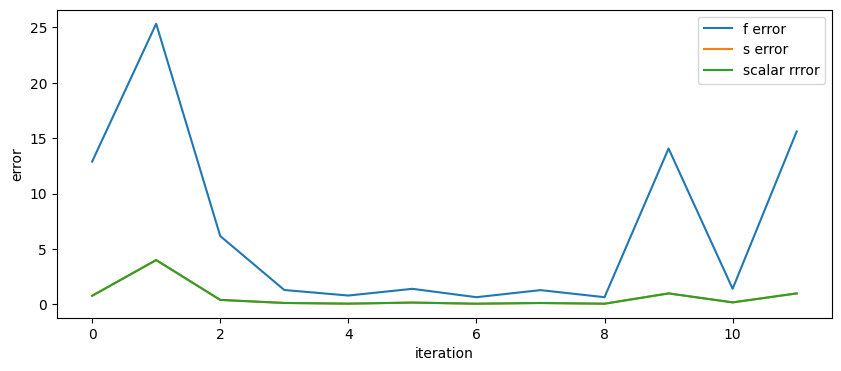

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


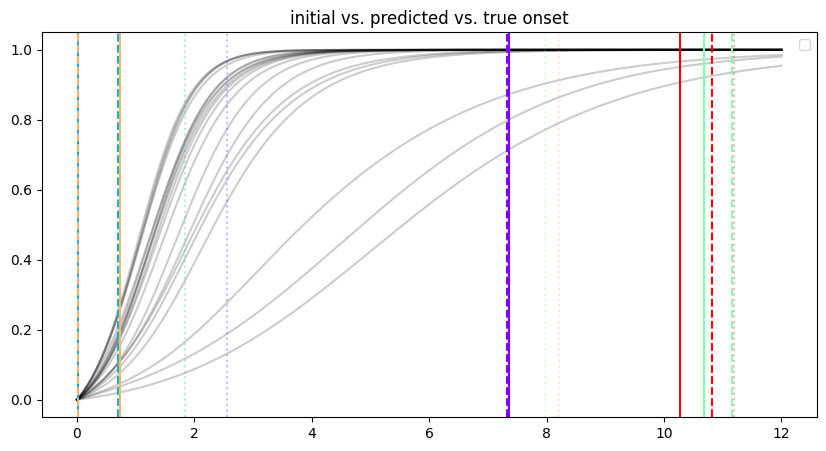

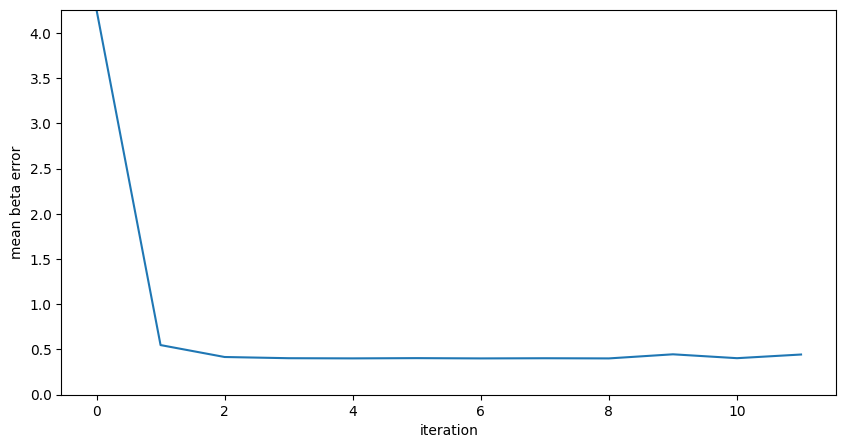

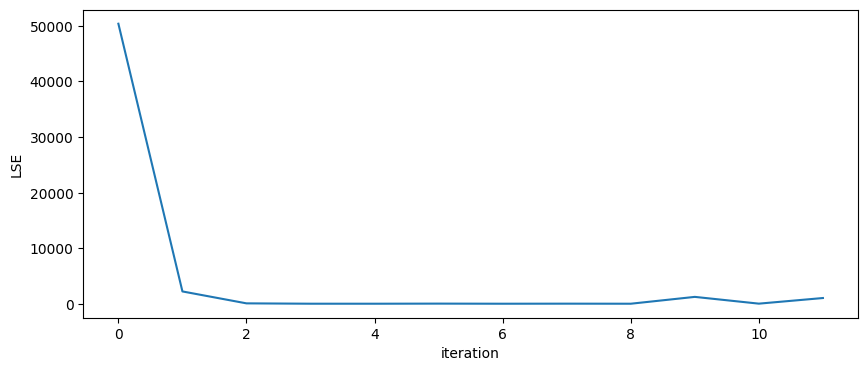

In [5]:
em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=False,
              lambda_cog=1.0,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


## cog = 1.0

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824 0.07986404 0.05383256
 0.10993993 0.13257945 0.08262026 0.14778845 0.02372415 0.14300063
 0.0170779  0.10647585]
initial s: [2.79544046 1.30685669 0.19175346 0.80942044 2.73783142 2.61493628
 0.97118118 0.89594654 2.56627958 1.23194763 2.76895385 1.07435375
 2.58501779 1.07953042 1.76070828 2.50507976 0.17556968 1.85950923
 2.64783123 0.4718322 ]
initial scalar: 0.2251425668889057
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [10:00<00:54, 54.57s/it]



SUMMARY:
best LSE at iteration 11: 176.13325128898197
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01490907 0.16291554 0.08029182 0.184533
 0.15572293 0.19792942 0.02388094 0.10736655 0.1746095  0.11053824
 0.07986404 0.05383256 0.10993993 0.13257945 0.08262026 0.14778845
 0.02372415 0.14300063 0.0170779  0.10647585 2.79544046 1.30685669
 0.19175346 0.80942044 2.73783142 2.61493628 0.97118118 0.89594654
 2.56627958 1.23194763 2.76895385 1.07435375 2.58501779 1.07953042
 1.76070828 2.50507976 0.17556968 1.85950923 2.64783123 0.4718322
 0.22514257]
best theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.0

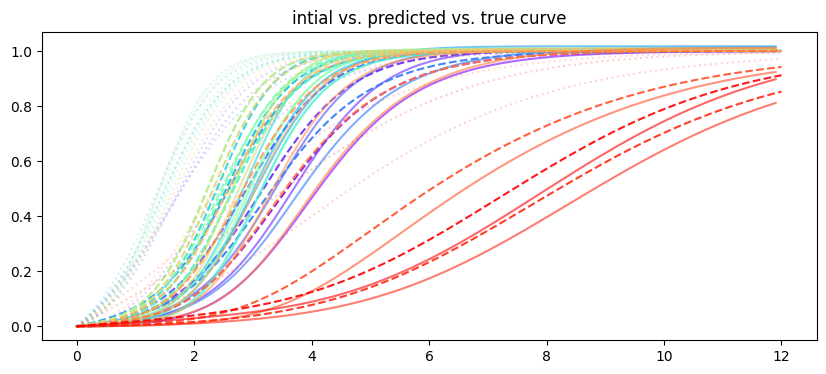

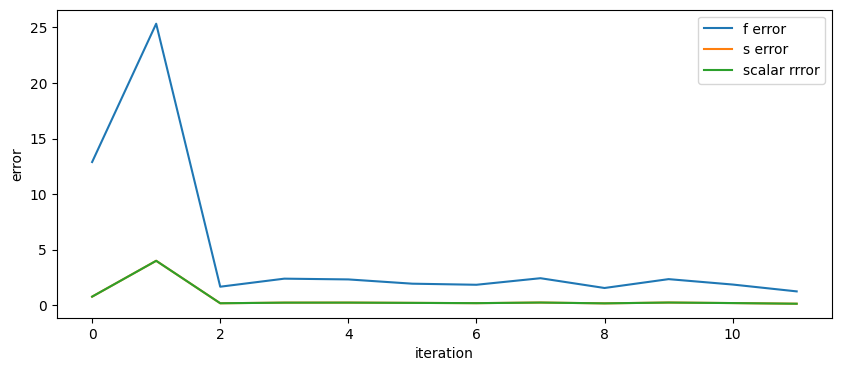

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


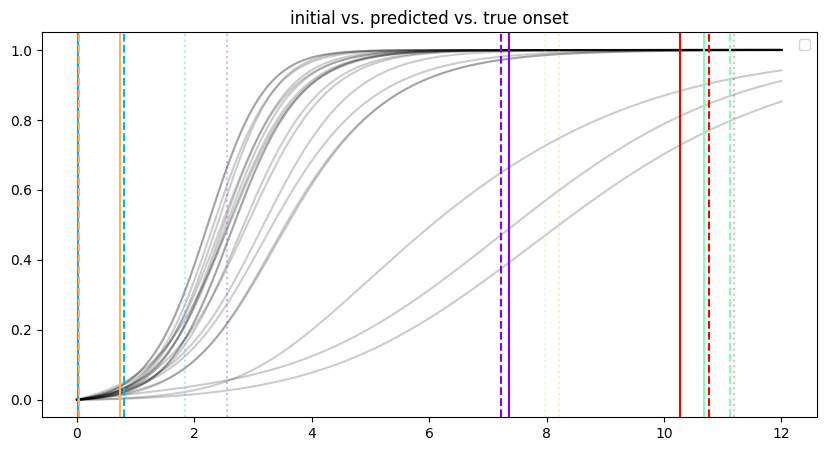

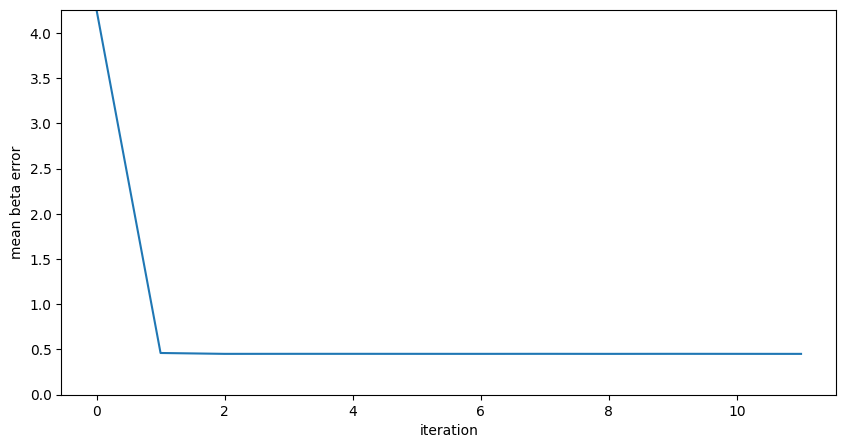

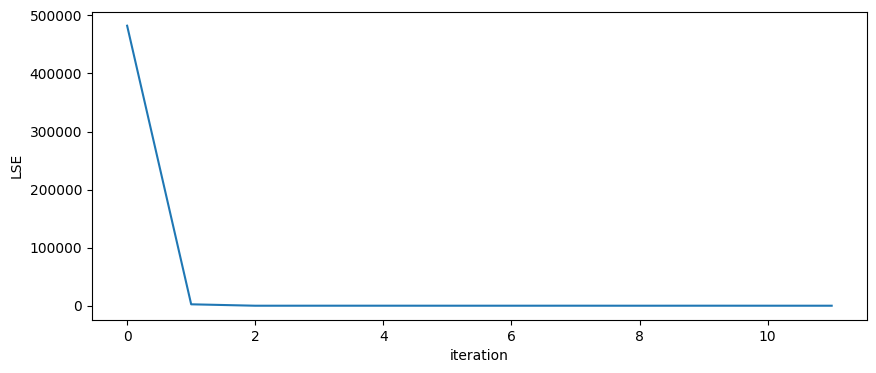

In [6]:
em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=False,
              lambda_cog=10.0,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)
